In [1]:
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
from src.models import IaF, StimulusICA

In [35]:
basal_depression_ratio = 1.2
apical_depression_ratio = 1.1

sica = StimulusICA()

num_inputs = sica.num_inputs
iaf = IaF(num_inputs, basal_depression_ratio, apical_depression_ratio)

In [36]:
T = 1000*1000
rate = np.zeros((T, num_inputs))
spikes = np.zeros(T)
vm = np.zeros(T)

for t in tqdm(range(T)):
    rate[t] = sica.step()[0]
    iaf.step(rate[t])
    vm[t] = iaf.vm
    spikes[t] = iaf.spike

  0%|          | 0/1000000 [00:00<?, ?it/s]

100%|██████████| 1000000/1000000 [02:29<00:00, 6686.27it/s]


In [33]:
num_spikes

127112

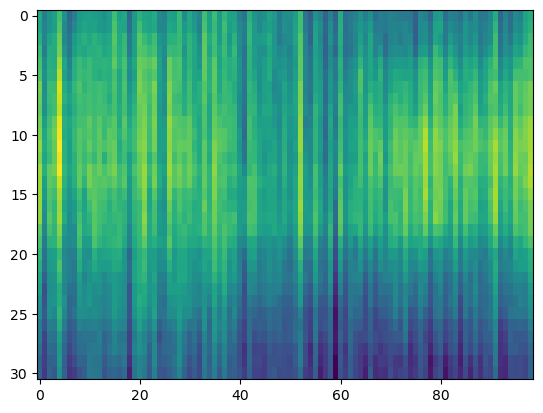

In [38]:
num_before = 20
num_after = 10
total_samples = num_before + num_after + 1
num_spikes = np.sum(spikes).astype(int)

sta = np.zeros((num_spikes, total_samples, num_inputs))
for ispike, spike_idx in enumerate(np.where(spikes)[0]):
    si = max(0, spike_idx-num_before)
    ei = min(T, spike_idx+num_after+1)
    sta[ispike] = rate[si:ei]

plt.imshow(np.mean(sta[-1000:], axis=0), aspect="auto")
plt.show()

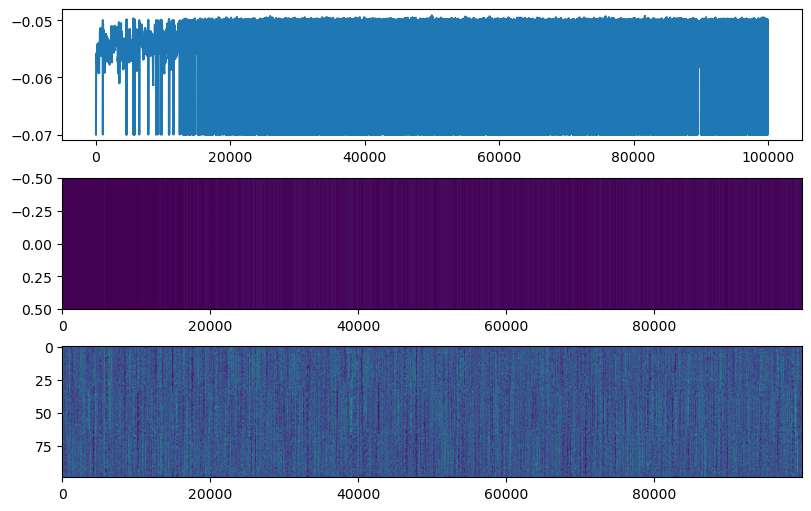

In [4]:
fig, ax = plt.subplots(3, 1, figsize=(8, 5), layout="constrained")
ax[0].plot(vm)
ax[1].imshow(spikes.reshape(1, -1), aspect="auto")
ax[2].imshow(rate.T, aspect="auto")
plt.show()